In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

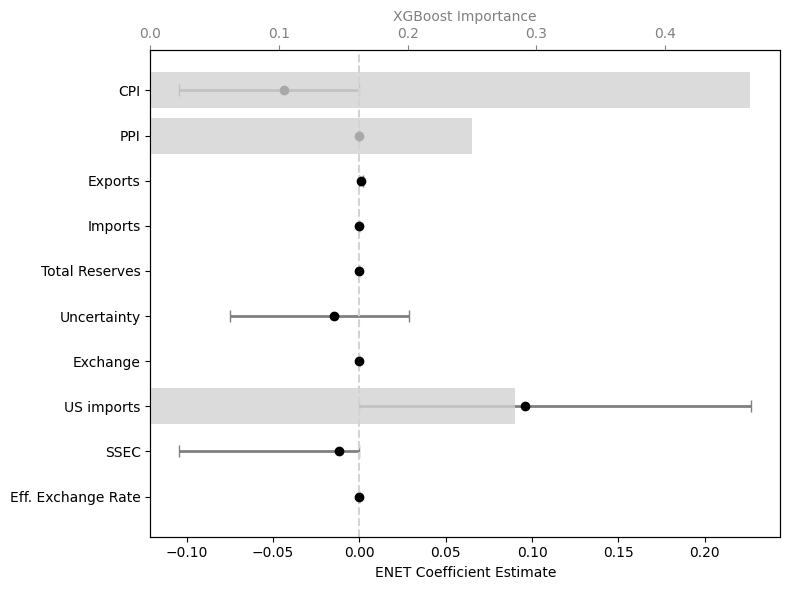

In [3]:
# Load data
df = pd.read_csv('4_variable_analysis_CN.csv')

# Drop rows with missing confidence intervals
df_filtered = df.dropna(subset=['Lower_CI_95', 'Upper_CI_95'])

# Ensure XGBoost importance is aligned with filtered variables
df_filtered = df_filtered[df_filtered['Variables'].isin(df['Variables'])]

# Compute error bars (distance from coefficient to CI bounds)
lower_err = (df_filtered['Coefficient'] - df_filtered['Lower_CI_95']).abs()
upper_err = (df_filtered['Upper_CI_95'] - df_filtered['Coefficient']).abs()

# Plot settings
fig, ax1 = plt.subplots(figsize=(8, 6))

# ENET Regression Coefficients with 95% CI
ax1.errorbar(df_filtered['Coefficient'], df_filtered['Variables'],
             xerr=[lower_err, upper_err],
             fmt='o', color='black', ecolor='gray', elinewidth=2, capsize=4,
             label='ENET Coef (95% CI)')

# Reference line at 0
ax1.axvline(0, color='lightgray', linestyle='--')

# Axis labels and style
ax1.set_xlabel('ENET Coefficient Estimate', color='black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')

# XGBoost importance on top x-axis
ax2 = ax1.twiny()

# Match importance values to filtered rows
xgb_importance = df.set_index('Variables').loc[df_filtered['Variables'], 'importance']

ax2.barh(df_filtered['Variables'], xgb_importance, color='lightgray', alpha=0.8)
ax2.set_xlabel('XGBoost Importance', color='gray')
ax2.tick_params(axis='x', colors='gray')

# Layout and export
fig.tight_layout()
plt.savefig("CN_variables.pdf", bbox_inches='tight', dpi=500)
plt.show()

